# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [3]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 16:26:11+01:00', empty=False)

 Muestreo cada 10 segundos, promediando datos (mean)  y usando metodo relleno=ffill

In [4]:
ta = '2023-03-07 11:10:38+01:00' #tiempo inicial
tb = '2023-03-07 16:26:11+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity           voltage         power             voltage  \
type                      armonic43     armonic38 armonic47 armonic45   
2023-03-07 11:10:40+01:00  0.015158  2.340000e-06  0.000003  0.006801   
2023-03-07 11:10:50+01:00  0.016303  2.700000e-06  0.000004  0.006961   
2023-03-07 11:11:00+01:00  0.017462 -3.200000e-06 -0.000001  0.007047   
2023-03-07 11:11:10+01:00  0.013478 -8.560000e-06 -0.000015  0.006325   
2023-03-07 11:11:20+01:00  0.013530 -8.180000e-06 -0.000008  0.008077   
...                             ...           ...       ...       ...   
2023-03-07 16:25:30+01:00  0.010703 -1.728000e-05  0.000059  0.012109   
2023-03-07 16:25:40+01:00  0.017869 -3.999998e-08 -0.000041  0.006966   
2023-03-07 16:25:50+01:00  0.017467  8.400000e-07 -0.000051  0.007362   
2023-03-07 16:26:00+01:00  0.024445 -7.999999e-08 -0.000071  0.007733   
2023-03-07 16:26:10+01:00  0.016635 -1.200000e-06 -0.000087  0.007295   

physical_quantity             power   voltage   current     power   voltage  \
type                      armonic17 armonic24 armonic44 armonic39 armonic41   
2023-03-07 11:10:40+01:00 -0.003859  0.008020  0.000657 -0.000114  0.017857   
2023-03-07 11:10:50+01:00 -0.004200  0.007344  0.000595 -0.000133  0.017296   
2023-03-07 11:11:00+01:00 -0.006364  0.009029  0.001757 -0.000106  0.015219   
2023-03-07 11:11:10+01:00 -0.001299  0.008396  0.003678 -0.000034  0.017656   
2023-03-07 11:11:20+01:00 -0.001768  0.007707  0.003343  0.000024  0.018578   
...                             ...       ...       ...       ...       ...   
2023-03-07 16:25:30+01:00 -0.003222  0.008356  0.004899  0.000014  0.024713   
2023-03-07 16:25:40+01:00 -0.002514  0.008070  0.001176 -0.000043  0.014500   
2023-03-07 16:25:50+01:00 -0.002703  0.007531  0.001144 -0.000053  0.014966   
2023-03-07 16:26:00+01:00 -0.003496  0.008363  0.000984 -0.000002  0.010896   
2023-03-07 16:26:10+01:00 -0.005270  0.011620  0.000721 -0.000069  0.011130   

physical_quantity                 power  ...                current  \
type                          armonic40  ...       active  armonic7   
2023-03-07 11:10:40+01:00  8.000000e-07  ...    21.457386  0.032366   
2023-03-07 11:10:50+01:00  1.100000e-06  ...    21.571932  0.033487   
2023-03-07 11:11:00+01:00  1.938000e-05  ...   341.697479  0.059555   
2023-03-07 11:11:10+01:00 -1.500000e-05  ...  2775.212402  0.252902   
2023-03-07 11:11:20+01:00 -8.420000e-06  ...  2806.480957  0.255844   
...                                 ...  ...          ...       ...   
2023-03-07 16:25:30+01:00 -3.580000e-06  ...  1395.808594  0.357849   
2023-03-07 16:25:40+01:00  1.400000e-06  ...    94.551079  0.054724   
2023-03-07 16:25:50+01:00 -6.000000e-07  ...    18.198618  0.035256   
2023-03-07 16:26:00+01:00  1.220000e-06  ...    17.486288  0.033520   
2023-03-07 16:26:10+01:00  3.850000e-06  ...    17.594389  0.033763   

physical_quantity                 power   voltage                      \
type                          armonic48 armonic20  armonic6 armonic44   
2023-03-07 11:10:40+01:00  9.600001e-07  0.009649  0.023955  0.006646   
2023-03-07 11:10:50+01:00  1.120000e-06  0.008181  0.030216  0.006695   
2023-03-07 11:11:00+01:00  3.600000e-07  0.008085  0.029847  0.006293   
2023-03-07 11:11:10+01:00 -1.140000e-06  0.011471  0.066223  0.006607   
2023-03-07 11:11:20+01:00 -2.520000e-06  0.011074  0.061333  0.006611   
...                                 ...       ...       ...       ...   
2023-03-07 16:25:30+01:00 -1.042000e-05  0.011659  0.019930  0.007684   
2023-03-07 16:25:40+01:00  2.160000e-06  0.008294  0.049280  0.006360   
2023-03-07 16:25:50+01:00  2.360000e-06  0.008510  0.061179  0.006214   
2023-03-07 16:26:00+01:00  1.020000e-06  0.010178  0.086957  0.007273   
2023-03-07 16:26:10+01:00  2.250000e-06  0.009767  0.106213  0.006289   

physical_quantity                     current     power               
type                      armonic16 armonic14 armonic50     apparent  
2023-0

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [5]:


next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity           voltage         power             voltage  \
type                      armonic43     armonic38 armonic47 armonic45   
2023-03-07 11:10:40+01:00  0.016526 -2.000000e-07  0.000005  0.006769   
2023-03-07 11:10:50+01:00  0.018830 -4.000000e-07 -0.000007  0.008083   
2023-03-07 11:11:00+01:00  0.019960  2.400000e-06  0.000011  0.005702   
2023-03-07 11:11:10+01:00  0.012535  1.600000e-06 -0.000009  0.008136   
2023-03-07 11:11:20+01:00  0.013254 -1.000000e-06 -0.000011  0.012510   
...                             ...           ...       ...       ...   
2023-03-07 16:25:30+01:00  0.013974 -1.900000e-05  0.000056  0.009874   
2023-03-07 16:25:40+01:00  0.012013 -2.200000e-06  0.000014  0.006772   
2023-03-07 16:25:50+01:00  0.017537 -1.600000e-06 -0.000069  0.007577   
2023-03-07 16:26:00+01:00  0.018278  2.273737e-14 -0.000058  0.008371   
2023-03-07 16:26:10+01:00  0.013747 -1.400000e-06 -0.000088  0.006851   

physical_quantity             power   voltage   current     power   voltage  \
type                      armonic17 armonic24 armonic44 armonic39 armonic41   
2023-03-07 11:10:40+01:00 -0.003504  0.007790  0.000834 -0.000125  0.018796   
2023-03-07 11:10:50+01:00 -0.003780  0.006806  0.000813 -0.000140  0.018178   
2023-03-07 11:11:00+01:00 -0.006782  0.009035  0.000837 -0.000133  0.013351   
2023-03-07 11:11:10+01:00 -0.001076  0.008468  0.002358 -0.000119  0.016183   
2023-03-07 11:11:20+01:00 -0.001880  0.012126  0.003117 -0.000009  0.019338   
...                             ...       ...       ...       ...       ...   
2023-03-07 16:25:30+01:00 -0.003134  0.009997  0.004957  0.000004  0.025935   
2023-03-07 16:25:40+01:00 -0.002293  0.009607  0.002909 -0.000008  0.020418   
2023-03-07 16:25:50+01:00 -0.002870  0.004799  0.001036 -0.000054  0.014646   
2023-03-07 16:26:00+01:00 -0.003241  0.003656  0.000778 -0.000069  0.015425   
2023-03-07 16:26:10+01:00 -0.005208  0.009572  0.000695 -0.000061  0.008359   

physical_quantity                 power  ...                current  \
type                          armonic40  ...       active  armonic7   
2023-03-07 11:10:40+01:00  1.600000e-06  ...    21.885660  0.033253   
2023-03-07 11:10:50+01:00  2.000000e-06  ...    21.544119  0.031756   
2023-03-07 11:11:00+01:00  6.000000e-07  ...    21.457960  0.033639   
2023-03-07 11:11:10+01:00 -1.160000e-05  ...  2432.036133  0.233919   
2023-03-07 11:11:20+01:00 -1.740000e-05  ...  2802.612061  0.258962   
...                                 ...  ...          ...       ...   
2023-03-07 16:25:30+01:00  1.160000e-05  ...  1390.618042  0.357215   
2023-03-07 16:25:40+01:00 -1.600000e-06  ...   765.692078  0.220134   
2023-03-07 16:25:50+01:00 -4.000000e-06  ...    17.189579  0.031876   
2023-03-07 16:26:00+01:00  1.400000e-06  ...    17.588820  0.033518   
2023-03-07 16:26:10+01:00  6.200000e-06  ...    17.607880  0.033711   

physical_quantity                 power   voltage                      \
type                          armonic48 armonic20  armonic6 armonic44   
2023-03-07 11:10:40+01:00  3.200000e-06  0.016549  0.028245  0.006044   
2023-03-07 11:10:50+01:00  2.400000e-06  0.010779  0.029969  0.009149   
2023-03-07 11:11:00+01:00  1.600000e-06  0.007964  0.027536  0.006245   
2023-03-07 11:11:10+01:00  8.000001e-07  0.008841  0.065703  0.005253   
2023-03-07 11:11:20+01:00  2.000000e-06  0.010568  0.053951  0.005651   
...                                 ...       ...       ...       ...   
2023-03-07 16:25:30+01:00 -2.820000e-05  0.007694  0.017099  0.006393   
2023-03-07 16:25:40+01:00  6.600000e-06  0.012222  0.031410  0.004508   
2023-03-07 16:25:50+01:00  4.800000e-06  0.005829  0.049370  0.007432   
2023-03-07 16:26:00+01:00 -3.999999e-07  0.011884  0.052051  0.010816   
2023-03-07 16:26:10+01:00  2.000000e-06  0.011754  0.113575  0.005084   

physical_quantity                     current         power               
type                      armonic16 armonic14     armonic50     apparent 

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

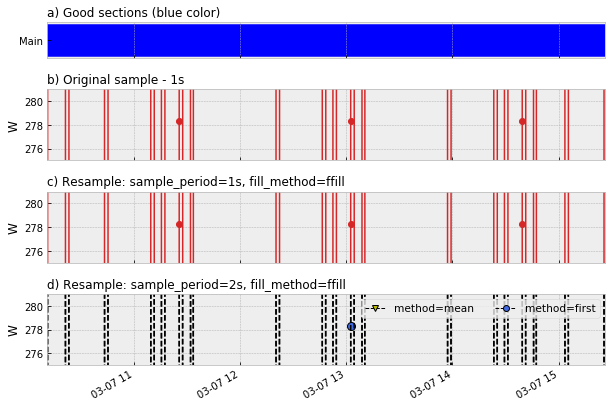

In [6]:
rcParams['figure.figsize'] = (10, 7)



#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
#ax1.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
#ax2.annotate("|09:42:00 = 277 W", xy=('2022-11-22 09:42:00+01:00', 277.6))
ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
#l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
#ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [7]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [8]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [18]:
train = DataSet('dsualmh.h5')

train.set_window(start="2023-03-07 11:10:38", end="2023-03-07 13:12:15")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

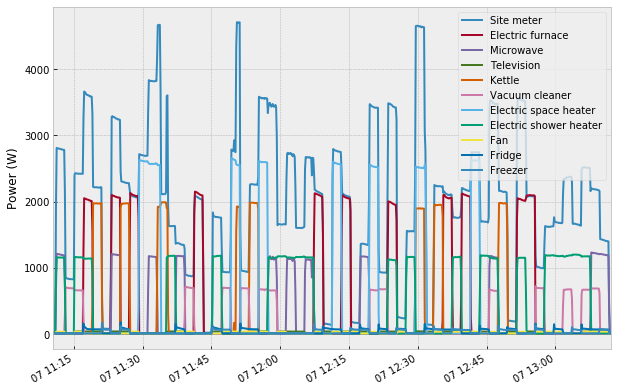

In [19]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [9]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2023-03-07 12:10:38", end="2023-03-07 14:58:34")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-03-07 12:10:38+01:00', end='2023-03-07 14:58:34+01:00', empty=False)

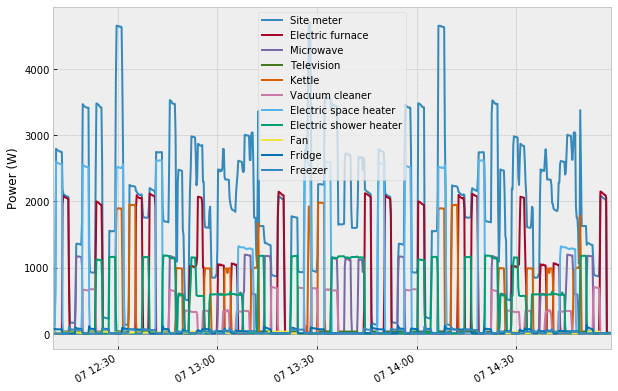

In [10]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [11]:
test = DataSet('dsualmh.h5') #Pruebas

test.set_window(start="2023-03-07 15:42:23", end="2023-03-07 16:26:11")

test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-03-07 15:42:23+01:00', end='2023-03-07 16:26:11+01:00', empty=False)

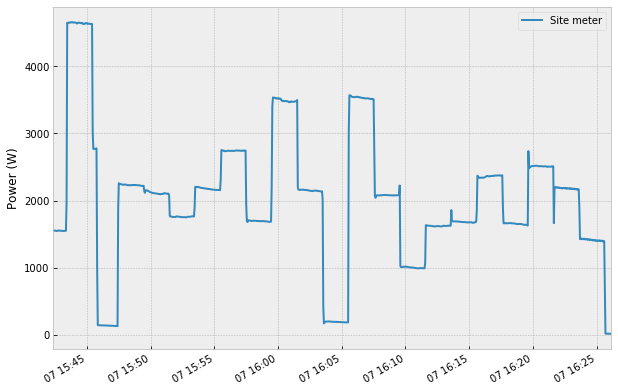

In [12]:
test_elec.mains().plot()